# Домашнє завдання: Інтеграція Python та SQL: запити даних

Це ДЗ передбачене під виконання на локальній машині. Виконання з Google Colab буде суттєво ускладнене.

## Підготовка
1. Переконайтесь, що у вас встановлены необхідні бібліотеки:
   ```bash
   pip install sqlalchemy pymysql pandas matplotlib seaborn python-dotenv
   ```

2. Створіть файл `.env` з параметрами підключення до бази даних classicmodels. Базу даних ви можете отримати через

  - docker-контейнер згідно існтрукції в [документі](https://www.notion.so/hannapylieva/Docker-1eb94835849480c9b2e7f5dc22ee4df9), також відео інструкції присутні на платформі - уроки "MySQL бази, клієнт для роботи з БД, Docker і ChatGPT для запитів" та "Як встановити Docker для роботи з базами даних без терміналу"
  - або встановивши локально цю БД - для цього перегляньте урок "Опціонально. Встановлення MySQL та  БД Сlassicmodels локально".
  
  Приклад `.env` файлу ми створювали в лекції. Ось його обовʼязкове наповнення:
    ```
    DB_HOST=your_host
    DB_PORT=3306 або 3307 - той, який Ви налаштували
    DB_USER=your_username
    DB_PASSWORD=your_password
    DB_NAME=classicmodels
    ```
  Якщо ви створили цей файл під час перегляду лекції - **новий створювати не треба**. Замініть лише назву БД, або пропишіть назву в коді створення підключення (замість отримання назви цільової БД зі змінних оточення). Але переконайтесь, що до `.env` файл лежить в тій самій папці, що і цей ноутбук.

  **УВАГА!** НЕ копіюйте скрит для **створення** `.env` файлу. В лекції він наводиться для прикладу. І давалось пояснення, що в реальних проєктах ми НІКОЛИ не пишемо доступи до бази в коді. Копіювання скрипта для створення `.env` файлу сюди в ДЗ буде вважатись грубою помилкою і ми зніматимемо бали.

3. Налаштуйте підключення через SQLAlchemy до БД за прикладом в лекції.

Рекомендую вивести (відобразити) змінну engine після створення. Вона має бути не None! Якщо None - значить у Вас не підтягнулись налаштування з .env файла.

Ви також можете налаштувати параметри підключення до БД без .env файла, просто прописавши текстом в відповідних місцях. Це - не рекомендований підхід.

In [54]:
!pip install scipy

   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/38.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/38.5 MB ? eta -:--:--
    --------------------------------------- 0.5/38.5 MB 711.1 kB/s eta 0:00:54
   - -------------------------------------- 1.0/38.5 MB 1.0 MB/s eta 0:00:36
   - -------------------------------------- 1.3/38.5 MB 1.1 MB/s eta 0:00:33
   - -------------------------------------- 1.6/38.5 MB 1.2 MB/s eta 0:00:31
   - -------------------------------------- 1.8/38.5 MB 1.3 MB/s eta 0:00:29
   -- ------------------------------------- 2.4/38.5 MB 1.4 MB/s eta 0:00:27
   -- ------------------------------------- 2.9/38.5 MB 1.5 MB/s eta 0:00:25
   --- ------------------------------------ 3.1/38.5 MB 1.5 MB/s eta 0:00:24
   --- ------------------------------------ 3.7/38.5 MB 1.6 MB/s eta 0:00:22
   ---- -----------------

In [1]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import sqlalchemy as sa
from sqlalchemy import create_engine, text
from dotenv import load_dotenv

In [3]:
# Підключення до БД
def create_connection():
    load_dotenv()

    host = os.getenv('DB_HOST')
    port = os.getenv('DB_PORT', '3306')
    user = os.getenv('DB_USER')
    password = os.getenv('DB_PASSWORD')
    database = os.getenv('DB_NAME')

    connection_string = f"mysql+pymysql://{user}:{password}@{host}:{port}/{database}"

    engine = create_engine(
        connection_string,
        pool_size=1,
        max_overflow=20,
        pool_pre_ping=True,
        echo=False
    )

    return engine

engine = create_connection()

### Завдання 1: Простий запит

Ми працюємо з БД Classicmodels.

**Виведіть інформацію про продукти на складі** з наступними полями:
- назва продукту (productName)
- лінійка продукту (productLine)
- кількість на складі (quantityInStock)
- ціна закупки (buyPrice)

Зчитайте дані з БД з допомогою `pd.read_sql()` з SQLAlchemy engine, який ви створили на етапі підготовки.

Виведіть перші 10 продуктів, відсортованих за кількістю на складі (від більшої кількості до меншої).

In [4]:
# SQL-запит
query = text("""
    SELECT productName, productLine, quantityInStock, buyPrice
    FROM products
    ORDER BY quantityInStock DESC
    LIMIT 10
""")

# Зчитуємо результат у DataFrame
df = pd.read_sql(query, engine)

# Виводимо таблицю
display(df)


,productName,productLine,quantityInStock,buyPrice
0,2002 Suzuki XREO,Motorcycles,9997,66.27
1,1995 Honda Civic,Classic Cars,9772,93.89
2,America West Airlines B757-200,Planes,9653,68.80
3,2002 Chevy Corvette,Classic Cars,9446,62.11
4,1932 Model A Ford J-Coupe,Vintage Cars,9354,58.48
5,1982 Ducati 996 R,Motorcycles,9241,24.14
6,1912 Ford Model T Delivery Wagon,Vintage Cars,9173,46.91
7,1976 Ford Gran Torino,Classic Cars,9127,73.49
8,1968 Dodge Charger,Classic Cars,9123,75.16
9,1965 Aston Martin DB5,Classic Cars,9042,65.96



### Завдання 2: Аналітика замовлень за 2004 рік (3 бали)

**Виведіть детальну інформацію про замовлення за 2004 рік** з наступними полями:
- Номер замовлення (orderNumber)
- Дата замовлення (orderDate)
- Статус замовлення (status)
- Ім'я клієнта (customerName)
- Країна клієнта (country)
- Загальна сума замовлення (сума всіх orderdetails.quantityOrdered * orderdetails.priceEach)

Використайте JOIN для об'єднання таблиць orders, customers, orderdetails. Додайте параметризацію за роком (тільки замовлення за 2004 рік).

Використайте `text()` та named parameters для формування запиту з SQLAlchemy.

Після отримання даних з БД проведіть обчислення з Python та напишіть висновки:
1. Побудуйте стовпчасту діаграму суми замовлень по країнам і напишіть, в якій країні найбільша сума замовлень за 2004 рік.
2. В країні з найбільшою кількістю замовлень знайдіть клієнта, який зробив замовлень на найбільшу суму і виведіть імʼя цього клієнта, на яку суму він зробив замовлень і який % від всіх замовлень в цій країні становить його сума замовлень за рік.

In [7]:
from sqlalchemy import text

year = 2004

query = text("""
    SELECT 
        o.orderNumber,
        o.orderDate,
        o.status,
        c.customerName,
        c.country,
        SUM(od.quantityOrdered * od.priceEach) AS totalAmount
    FROM orders o
    JOIN customers c ON o.customerNumber = c.customerNumber
    JOIN orderdetails od ON o.orderNumber = od.orderNumber
    WHERE YEAR(o.orderDate) = :year
    GROUP BY o.orderNumber, o.orderDate, o.status, c.customerName, c.country
    ORDER BY o.orderDate
""")

df = pd.read_sql(query, engine, params={"year": year})
display(df.head())


,orderNumber,orderDate,status,customerName,country,totalAmount
0,10208,2004-01-02,Shipped,"Saveley & Henriot, Co.",France,49614.72
1,10209,2004-01-09,Shipped,"Men 'R' US Retailers, Ltd.",USA,21053.69
2,10210,2004-01-12,Shipped,Osaka Souveniers Co.,Japan,47177.59
3,10211,2004-01-15,Shipped,Auto Canal+ Petit,France,49165.16
4,10212,2004-01-16,Shipped,Euro+ Shopping Channel,Spain,59830.55


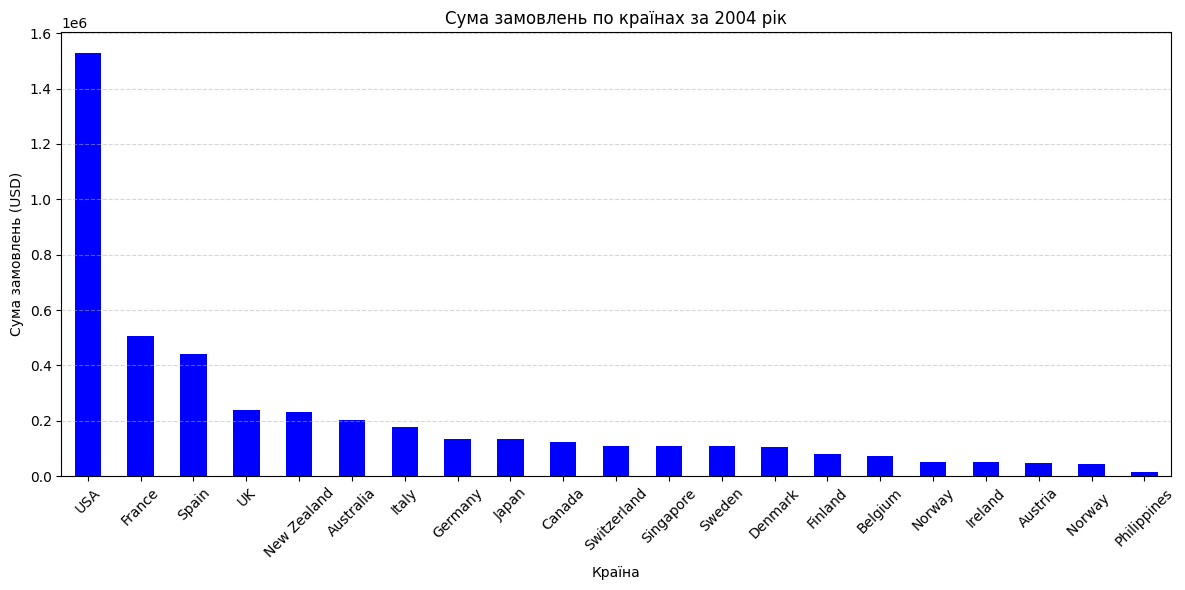

 Найбільша сума замовлень у країні: USA — $1,526,499.65


In [14]:
# Групуємо суму замовлень по країнах
country_sales = df.groupby("country")["totalAmount"].sum().sort_values(ascending=False)

# Побудова діаграми
plt.figure(figsize=(12, 6))
country_sales.plot(kind="bar", color="blue")
plt.title("Сума замовлень по країнах за 2004 рік")
plt.ylabel("Сума замовлень (USD)")
plt.xlabel("Країна")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Знаходимо країну з найбільшою сумою
top_country = country_sales.idxmax()
top_country_sum = country_sales.max()
print(f" Найбільша сума замовлень у країні: {top_country} — ${top_country_sum:,.2f}")


In [16]:
# Фільтруємо тільки замовлення з top_country
df_top_country = df[df["country"] == top_country]

# Групуємо по клієнту
customer_sales = df_top_country.groupby("customerName")["totalAmount"].sum()

# Знаходимо клієнта з найбільшою сумою
top_customer = customer_sales.idxmax()
top_customer_sum = customer_sales.max()

# Обчислюємо % частку
percentage = (top_customer_sum / df_top_country["totalAmount"].sum()) * 100

print(f"Клієнт з найбільшою сумою замовлень у {top_country}:")
print(f"Ім'я: {top_customer}")
print(f"Сума замовлень: ${top_customer_sum:,.2f}")
print(f"Частка від загальної суми замовлень у країні: {percentage:.2f}%")


Клієнт з найбільшою сумою замовлень у USA:
Ім'я: Mini Gifts Distributors Ltd.
Сума замовлень: $231,562.53
Частка від загальної суми замовлень у країні: 15.17%



### Завдання 3: Аналітичний запит - Топ продуктів по продажах (6 балів)

В цьому завданні ви отримуєте 1 бал за правильний SQL запит і по 1 балу за кожне завдання з Python.

**Проведіть аналіз прибутковості продуктів** та для цього дістаньте з БД інформацію з наступними полями:
- Назва продукту
- Лінійка продукту (productLine)
- Загальний дохід з цього продукту (сума quantity * priceEach)
- Ранг продукту по доходу (тобто яке місце посідає цей продукт за доходом серед усіх продуктів в нашому магазині)
- Який відсоток від загального доходу компанії складає цей продукт
- Різниця з середнім доходом по лінійці продукту (в %)

Відсортуйте дані за спаданням значень колонки "Який відсоток від загального доходу компанії складає цей продукт".

При створенні SQL запиту вам можуть стати в нагоді:
- **CTE** для розрахунку доходу по кожному продукту
- **Віконні функції** для ранжування та порівняння з середнім

Після отримання даних з БД проведіть обчислення (де треба) з Python та напишіть висновки:
1. Який відсоток від загального доходу складає ТОП1 продукт і що це за продукт?
2. Створіть стовпчикову діаграму топ-10 продуктів по доходу. В скільки разів відрізняється сумарний дохід за ТОП1 продуктом від 10го продукту за сумою доходу?
3. Створіть кругову діаграму розподілу доходу по лініях продуктів. Який відсоток від всіх продажів становлять продажі за ТОП2 лініями сумарно?
4. Розрахуйте та виведіть за принципом Парето (80/20) - скільки продуктів дають 80% доходу. Тобто нам треба знайти кількість продуктів сумарне значення "відсотку від загального доходу компанії", яких складає 80 починаючи з продукту з найбільшим цим відсотком.
5. Зробіть ще будь-яке аналітичне дослідження, яке дасть нам більше розуміння наших даних, що ми дістали в БД в цьому завданні. Сформоване питання до даних і обчислення має бути обовʼязково. Візуалізація - опціонально.

Візуалізацію можна створювати з будь-якою бібліотекою на ваш вибір.

In [31]:
query = text("""
    WITH product_revenue AS (
        SELECT 
            p.productCode,
            p.productName,
            p.productLine,
            SUM(od.quantityOrdered * od.priceEach) AS total_revenue
        FROM products p
        JOIN orderdetails od ON p.productCode = od.productCode
        GROUP BY p.productCode, p.productName, p.productLine
    ),
    revenue_ranked AS (
        SELECT 
            *,
            RANK() OVER (ORDER BY total_revenue DESC) AS revenue_rank,
            SUM(total_revenue) OVER () AS total_company_revenue,
            ROUND(100.0 * total_revenue / SUM(total_revenue) OVER (), 4) AS revenue_pct,
            AVG(total_revenue) OVER (PARTITION BY productLine) AS avg_line_revenue
        FROM product_revenue
    )
    SELECT 
        productName,
        productLine,
        total_revenue,
        revenue_rank,
        revenue_pct,
        ROUND((total_revenue - avg_line_revenue) / avg_line_revenue * 100, 2) AS diff_from_avg_line_pct
    FROM revenue_ranked
    ORDER BY revenue_pct DESC
""")

df_products = pd.read_sql(query, engine)
display(df_products.head())


,productName,productLine,total_revenue,revenue_rank,revenue_pct,diff_from_avg_line_pct
0,1992 Ferrari 360 Spider red,Classic Cars,276839.98,1,2.8825,165.78
1,2001 Ferrari Enzo,Classic Cars,190755.86,2,1.9862,83.14
2,1952 Alpine Renault 1300,Classic Cars,190017.96,3,1.9785,82.43
3,2003 Harley-Davidson Eagle Drag Bike,Motorcycles,170686.00,4,1.7772,97.87
4,1968 Ford Mustang,Classic Cars,161531.48,5,1.6819,55.08


In [35]:
# Який відсоток від загального доходу складає ТОП1 продукт і що це за продукт?

top1 = df_products.iloc[0]
print(f"ТОП-1 продукт: {top1['productName']}")
print(f"Його дохід: ${top1['total_revenue']:,.2f}")
print(f"Частка від загального доходу: {top1['revenue_pct']:.2f}%")


ТОП-1 продукт: 1992 Ferrari 360 Spider red
Його дохід: $276,839.98
Частка від загального доходу: 2.88%


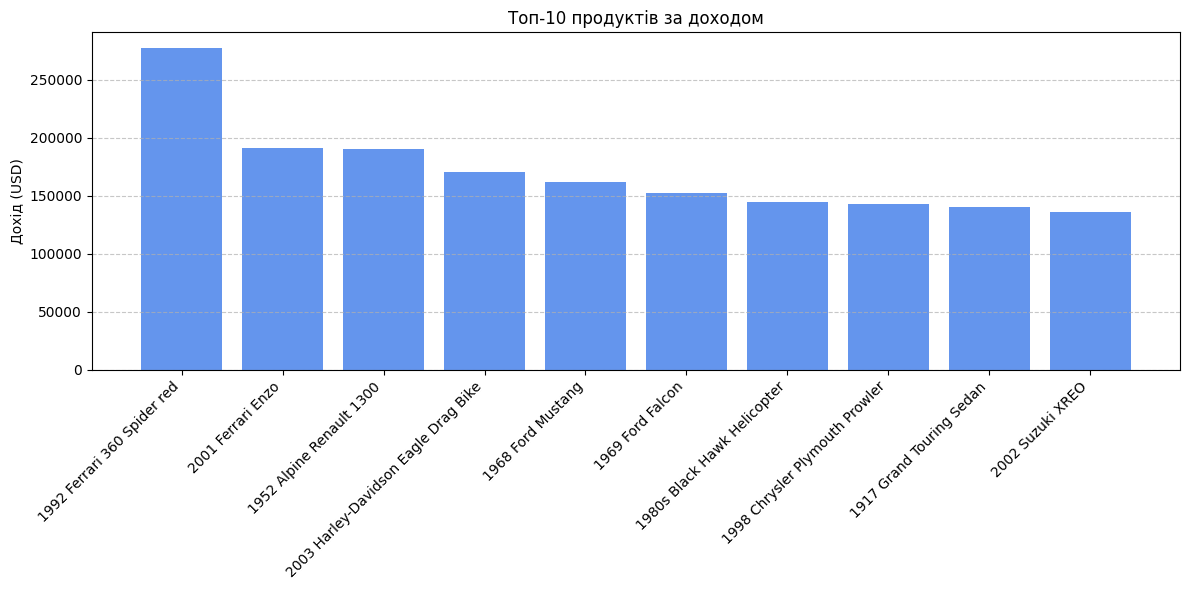

 Дохід ТОП-1 продукту в 2.04 рази більший, ніж у 10-го.


In [39]:
# Створіть стовпчикову діаграму топ-10 продуктів по доходу. 
# В скільки разів відрізняється сумарний дохід за ТОП1 продуктом від 10го продукту за сумою доходу?

top10 = df_products.head(10)

plt.figure(figsize=(12,6))
plt.bar(top10['productName'], top10['total_revenue'], color='cornflowerblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Дохід (USD)")
plt.title("Топ-10 продуктів за доходом")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

diff = top10.iloc[0]['total_revenue'] / top10.iloc[9]['total_revenue']
print(f" Дохід ТОП-1 продукту в {diff:.2f} рази більший, ніж у 10-го.")


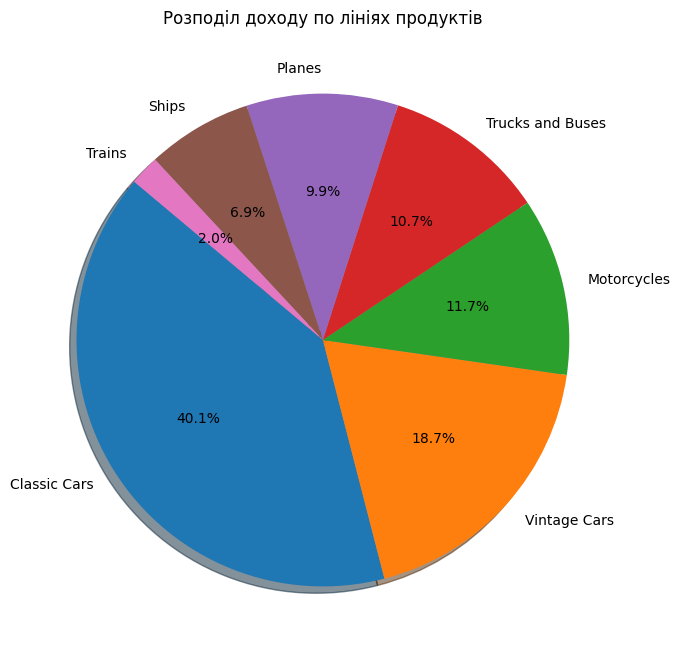

 ТОП-2 лінії продуктів формують 58.84% від усього доходу.


In [44]:
# Створіть кругову діаграму розподілу доходу по лініях продуктів. Який відсоток від всіх продажів становлять продажі за ТОП2 лініями сумарно?

line_revenue = df_products.groupby('productLine')['total_revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,8))
plt.pie(line_revenue, labels=line_revenue.index, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title("Розподіл доходу по лініях продуктів")
plt.show()

top2_share = line_revenue.head(2).sum() / line_revenue.sum() * 100
print(f" ТОП-2 лінії продуктів формують {top2_share:.2f}% від усього доходу.")


In [46]:
# Розрахуйте та виведіть за принципом Парето (80/20) - скільки продуктів дають 80% доходу. 
# Тобто нам треба знайти кількість продуктів сумарне значення "відсотку від загального доходу компанії", 
# яких складає 80 починаючи з продукту з найбільшим цим відсотком.

df_sorted = df_products.sort_values('revenue_pct', ascending=False).reset_index(drop=True)
df_sorted['cum_sum'] = df_sorted['revenue_pct'].cumsum()

pareto_cutoff = df_sorted[df_sorted['cum_sum'] <= 80]
num_pareto_products = pareto_cutoff.shape[0]

print(f"{num_pareto_products} продуктів формують перші 80% доходу компанії (згідно Парето).")


71 продуктів формують перші 80% доходу компанії (згідно Парето).


In [50]:
# Зробіть ще будь-яке аналітичне дослідження, яке дасть нам більше розуміння наших даних, що ми дістали в БД в цьому завданні. 
# Сформоване питання до даних і обчислення має бути обовʼязково. Візуалізація - опціонально.

# Яка лінія продуктів має найбільше відхилення від середнього доходу по своїй групі?"

line_variance = df_products.groupby("productLine")["diff_from_avg_line_pct"].agg(['mean', 'std']).sort_values(by='std', ascending=False)
display(line_variance)

most_variable_line = line_variance.index[0]
print(f" Найбільш нестабільна за прибутком лінія (в ній є дуже різні продукти за доходом): {most_variable_line}")


,mean,std
productLine,,
Classic Cars,5.405405e-04,48.116988
Motorcycles,1.093143e-15,43.654396
Vintage Cars,8.333333e-04,42.319109
Planes,-8.333333e-04,33.036616
Trucks and Buses,9.090909e-04,30.296087
Trains,0.000000e+00,27.277603
Ships,-1.111111e-03,24.913417


 Найбільш нестабільна за прибутком лінія (в ній є дуже різні продукти за доходом): Classic Cars


### ОПЦІОНАЛЬНО. Завдання 4: Аналітичний запит - Динаміка продажів по місяцях (8 балів)

**Проведіть аналіз динаміки продажів по місяцях** та для цього дістаньте з бази інформацію з наступними полями:
- Рік та місяць замовлень
- Кількість замовлень за цей рік-місяць
- Загальний дохід (quantityOrdered * priceEach) за цей рік-місяць
- На який % ми зросли за доходом порівняно з попереднім місяцем
- Накопичувальний дохід до цього місяця за рік
- Ковзне середнє доходу за 3 місяці
- Ранг цього місяця за доходом

Використайте:
- **CTE** для агрегації продажів по місяцях
- **Віконні функції** для розрахунку:
  - Зростання доходу порівняно з попереднім місяцем (LAG)
  - Накопичувальний дохід за рік
  - Ковзне середнє доходу за 3 місяці (AVG OVER)
  - Ранжування місяців за доходом (RANK)

Після отримання даних з БД побудуйте наступні графіки і напишіть коротко, які висновки з них можна зробити.
1. Створіть лінійний графік доходу по місяцях. Чи є тред до зростання в даних?
2. Створіть графік місяць-до-місяця зростання у відсотках.
3. Створіть heatmap сезонності (місяць vs рік)
4. Відобразіть козвне середнє разом з динамікою продажів.
5. Розрахуйте кореляцію між кількістю замовлень та середнім чеком та побудуйте графік розсіювання між цими змінними. Чи є лінійна залежність?

Очікуваний результат кожного графіку - нижче.
В першому графіку я додала лінію тренду аби показати тренд. Вам її додавати не треба.


In [57]:
import numpy as np
from scipy import stats

sales_dynamics = text("""

WITH monthly_sales AS (
    SELECT
        YEAR(o.orderDate) as sales_year,
        MONTH(o.orderDate) as sales_month,
        DATE_FORMAT(o.orderDate, '%Y-%m') as year_month_str,
        COUNT(DISTINCT o.orderNumber) as order_count,
        ROUND(SUM(od.quantityOrdered * od.priceEach), 2) as monthly_revenue,
        ROUND(AVG(od.quantityOrdered * od.priceEach), 2) as avg_order_value
    FROM orders o
    JOIN orderdetails od ON o.orderNumber = od.orderNumber
    WHERE o.status != 'Cancelled'
    GROUP BY YEAR(o.orderDate), MONTH(o.orderDate), DATE_FORMAT(o.orderDate, '%Y-%m')
),
sales_analytics AS (
    SELECT
        sales_year,
        sales_month,
        year_month_str,
        order_count,
        monthly_revenue,
        avg_order_value,
        LAG(monthly_revenue) OVER (ORDER BY sales_year, sales_month) as prev_month_revenue,
        ROUND(
            (monthly_revenue / LAG(monthly_revenue) OVER (ORDER BY sales_year, sales_month) - 1) * 100, 2
        ) as mom_growth_percent,
        SUM(monthly_revenue) OVER (
            PARTITION BY sales_year
            ORDER BY sales_month
            ROWS UNBOUNDED PRECEDING
        ) as yearly_cumulative,
        ROUND(
            AVG(monthly_revenue) OVER (
                ORDER BY sales_year, sales_month
                ROWS BETWEEN 2 PRECEDING AND CURRENT ROW
            ), 2
        ) as rolling_3month_avg,
        ROW_NUMBER() OVER (ORDER BY monthly_revenue DESC) as revenue_rank
    FROM monthly_sales
)
SELECT * FROM sales_analytics
ORDER BY sales_year, sales_month
""")

df_sales_dynamics = pd.read_sql(sales_dynamics, engine)
df_sales_dynamics['date'] = pd.to_datetime(df_sales_dynamics['year_month_str'])

print("Динаміка продажів по місяцях:")
display(df_sales_dynamics.head(10))

Динаміка продажів по місяцях:


,sales_year,sales_month,year_month_str,order_count,monthly_revenue,avg_order_value,prev_month_revenue,mom_growth_percent,yearly_cumulative,rolling_3month_avg,revenue_rank,date
0,2003,1,2003-01,5,116692.77,2992.12,NaN,NaN,116692.77,116692.77,29,2003-01-01
1,2003,2,2003-02,3,128403.64,3131.80,116692.77,10.04,245096.41,122548.21,28,2003-02-01
2,2003,3,2003-03,6,160517.14,3210.34,128403.64,25.01,405613.55,135204.52,26,2003-03-01
3,2003,4,2003-04,7,185848.59,3204.29,160517.14,15.78,591462.14,158256.46,23,2003-04-01
4,2003,5,2003-05,6,179435.55,3093.72,185848.59,-3.45,770897.69,175267.09,24,2003-05-01
5,2003,6,2003-06,7,150470.77,3201.51,179435.55,-16.14,921368.46,171918.30,27,2003-06-01
6,2003,7,2003-07,7,201940.36,3205.40,150470.77,34.21,1123308.82,177282.23,21,2003-07-01
7,2003,8,2003-08,5,178257.11,3073.40,201940.36,-11.73,1301565.93,176889.41,25,2003-08-01
8,2003,9,2003-09,8,236697.85,3114.45,178257.11,32.78,1538263.78,205631.77,17,2003-09-01
9,2003,10,2003-10,17,470169.12,3176.82,236697.85,98.64,2008432.90,295041.36,4,2003-10-01


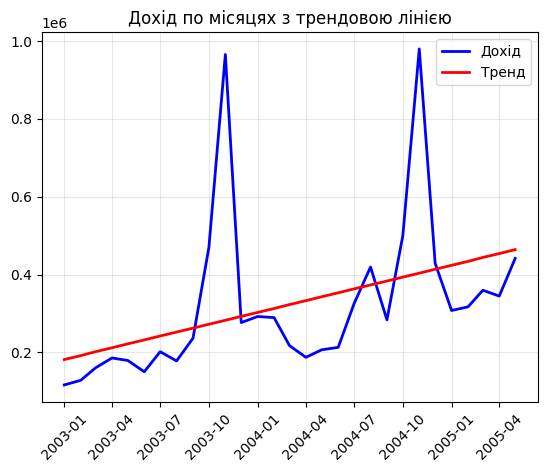

In [59]:
# 1. Створіть лінійний графік доходу по місяцях. Чи є тред до зростання в даних?

plt.figure()
plt.plot(df_sales_dynamics['date'], df_sales_dynamics['monthly_revenue'], 'b-', linewidth=2, label='Дохід')
z = np.polyfit(range(len(df_sales_dynamics)), df_sales_dynamics['monthly_revenue'], 1)
p = np.poly1d(z)
plt.plot(df_sales_dynamics['date'], p(range(len(df_sales_dynamics))), "r-", linewidth=2, label='Тренд')
plt.title('Дохід по місяцях з трендовою лінією')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)

Тренд по зростанню даних є.

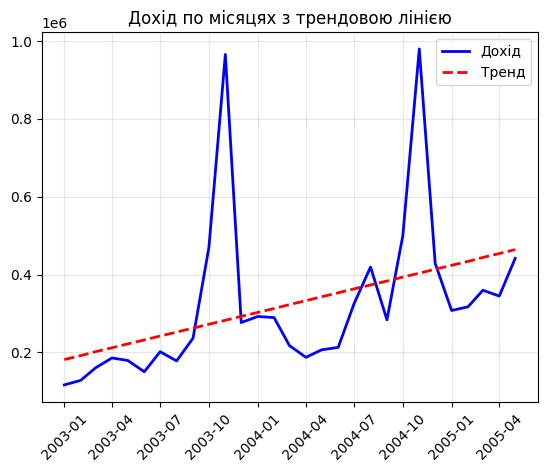

In [ ]:
# 1. Лінійний графік доходу з трендом (аби показати, що тренд є)


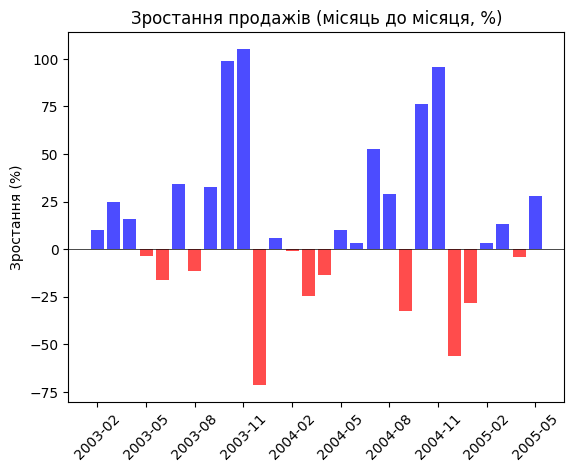

In [62]:
# 2. Створіть графік місяць-до-місяця зростання у відсотках.
plt.figure()
df_growth = df_sales_dynamics.dropna(subset=['mom_growth_percent'])
colors = ['blue' if x >= 0 else 'red' for x in df_growth['mom_growth_percent']]
plt.bar(range(len(df_growth)), df_growth['mom_growth_percent'], color=colors, alpha=0.7)
plt.title('Зростання продажів (місяць до місяця, %)')
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
plt.xticks(range(0, len(df_growth), 3),
           [df_growth.iloc[i]['year_month_str'] for i in range(0, len(df_growth), 3)],
           rotation=45)
plt.ylabel('Зростання (%)');

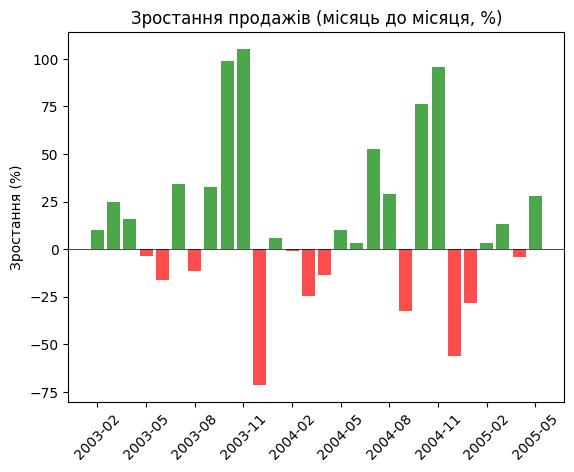

In [ ]:
# 2. Місяць-до-місяця зростання


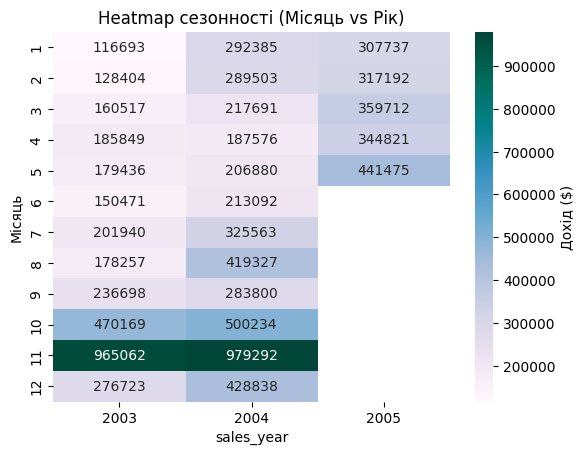

In [68]:
# 3. Створіть heatmap сезонності (місяць vs рік)
plt.figure()
pivot_sales = df_sales_dynamics.pivot(index='sales_month', columns='sales_year', values='monthly_revenue')
sns.heatmap(pivot_sales, annot=True, fmt='.0f', cmap='PuBuGn', cbar_kws={'label': 'Дохід ($)'})
plt.title('Heatmap сезонності (Місяць vs Рік)')
plt.ylabel('Місяць');

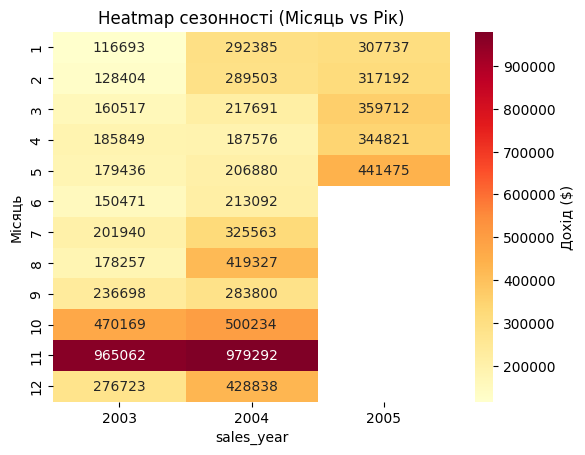

In [ ]:
# 3. Heatmap сезонності


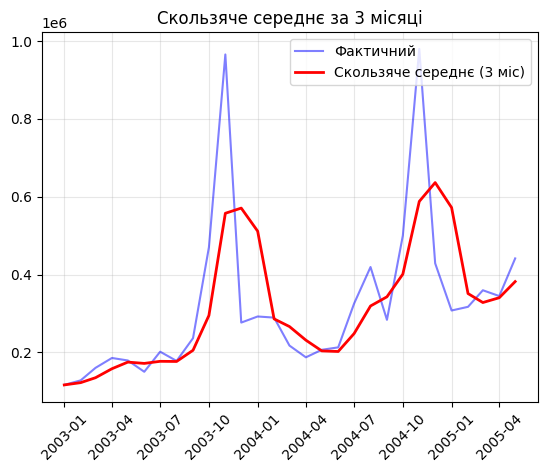

In [69]:
# 4. Відобразіть козвне середнє разом з динамікою продажів.

plt.figure()
plt.plot(df_sales_dynamics['date'], df_sales_dynamics['monthly_revenue'], 'b-', alpha=0.5, label='Фактичний')
plt.plot(df_sales_dynamics['date'], df_sales_dynamics['rolling_3month_avg'], 'r-', linewidth=2, label='Скользяче середнє (3 міс)')
plt.title('Скользяче середнє за 3 місяці')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

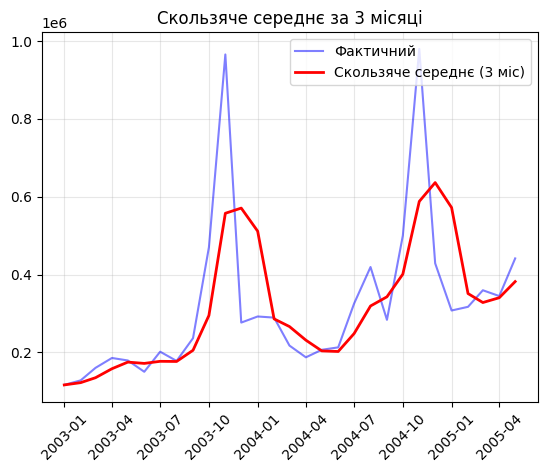

In [ ]:
# 4. Ковзне середнє з динімікою доходу


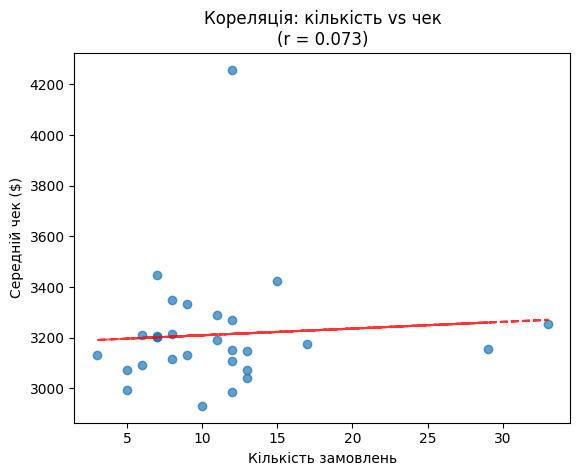

In [71]:
# 5. Розрахуйте кореляцію між кількістю замовлень та середнім чеком та побудуйте графік розсіювання між цими змінними. 
# Чи є лінійна залежність?
plt.figure()
correlation = df_sales_dynamics['order_count'].corr(df_sales_dynamics['avg_order_value'])
plt.scatter(df_sales_dynamics['order_count'], df_sales_dynamics['avg_order_value'], alpha=0.7)
plt.xlabel('Кількість замовлень')
plt.ylabel('Середній чек ($)')
plt.title(f'Кореляція: кількість vs чек\n(r = {correlation:.3f})')
z = np.polyfit(df_sales_dynamics['order_count'], df_sales_dynamics['avg_order_value'], 1)
p = np.poly1d(z)
plt.plot(df_sales_dynamics['order_count'], p(df_sales_dynamics['order_count']), "r--", alpha=0.8);

**Відповідь на питання чи є лінійна залежність**: r = 0.073 дуже близько до нуля — це означає, що між кількістю замовлень та середнім чеком практично немає лінійного зв’язку.
Лінія тренду (червона) майже горизонтальна — підтверджує, що збільшення кількості замовлень не приводить до суттєвого зростання або зменшення середнього чека.
Розкид точок дуже широкий по осі Y — середній чек варіюється, незалежно від кількості замовлень.

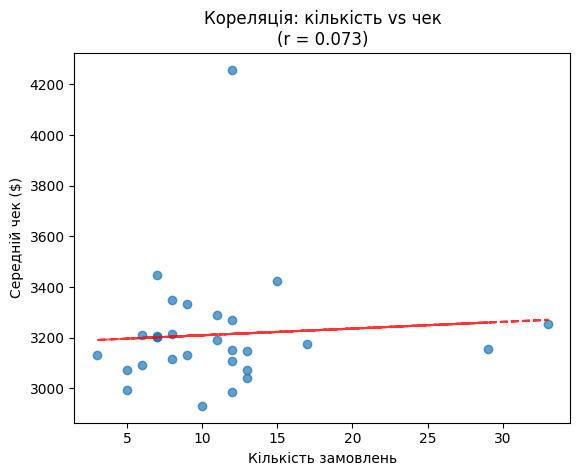

In [ ]:
# 5. Кореляція замовлень та середнього чеку
